In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kruskal
from scipy.stats import f_oneway

### Load each country's cleaned csv

In [33]:
df_benin = pd.read_csv('../data/benin_clean.csv')
df_sierraleone = pd.read_csv('../data/sierraleone_clean.csv')
df_togo = pd.read_csv('../data/togo_clean.csv')
df_benin = df_benin[df_benin['z_outlier'] == False]
df_sierraleone = df_sierraleone[df_sierraleone['z_outlier'] == False]
df_togo = df_togo[df_togo['z_outlier'] == False]

### Metric Comparison

C:\Users\hanna\AppData\Local\Temp\ipykernel_23220\1586793237.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(attr_values, labels=countries)
C:\Users\hanna\AppData\Local\Temp\ipykernel_23220\1586793237.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(attr_values, labels=countries)
C:\Users\hanna\AppData\Local\Temp\ipykernel_23220\1586793237.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(attr_values, labels=countries)


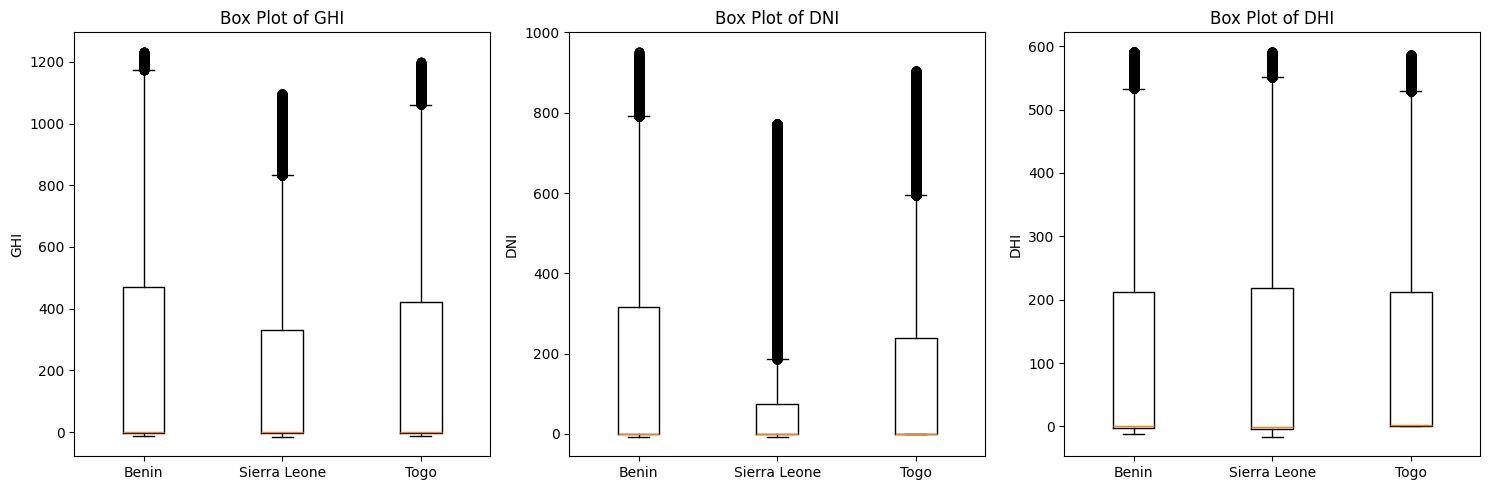

In [34]:
attrs = ["GHI", "DNI", "DHI"]
countries = ['Benin', 'Sierra Leone', 'Togo']
dataframes = [df_benin, df_sierraleone, df_togo]

# Create subplots — 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, attr in enumerate(attrs):
    # Collect the values for the current attribute
    attr_values = [df[attr] for df in dataframes]
    
    # Plot on the i-th subplot
    axes[i].boxplot(attr_values, labels=countries)
    axes[i].set_title(f'Box Plot of {attr}')
    axes[i].set_ylabel(attr)

plt.tight_layout()
plt.show()

In [ ]:
# List of countries and corresponding DataFrames
countries = ['Benin', 'Sierra Leone', 'Togo']
dataframes = [df_benin, df_sierraleone, df_togo]
attributes = ['GHI', 'DNI', 'DHI']

# Create an empty list to store results
summary_data = []

# Loop through each country and attribute to calculate stats
for country, df in zip(countries, dataframes):
    for attr in attributes:
        mean_val = df[attr].mean()
        median_val = df[attr].median()
        std_val = df[attr].std()
        
        summary_data.append({
            'Country': country,
            'Attribute': attr,
            'Mean': round(mean_val, 2),
            'Median': round(median_val, 2),
            'Std Dev': round(std_val, 2)
        })

# Convert to a summary DataFrame
summary_df = pd.DataFrame(summary_data)

# Pivot for a cleaner comparison table 
pivot_summary = summary_df.pivot(index='Attribute', columns='Country', values=['Mean', 'Median', 'Std Dev'])

# Display the pivot table
pivot_summary.head()


Mean                      Median                   Std Dev  \
Country     Benin Sierra Leone    Togo  Benin Sierra Leone Togo   Benin   
Attribute                                                                 
DHI        111.66       108.10  112.78    0.5         -0.6  1.5  153.10   
DNI        166.90       104.13  147.98   -0.1         -0.1  0.0  262.08   
GHI        236.23       185.00  223.86    0.7         -0.4  0.5  328.29   

                                
Country   Sierra Leone    Togo  
Attribute                       
DHI             153.69  151.57  
DNI             200.95  247.68  
GHI             279.02  317.31

### Statistical Testing

- Lets first do a normality (Shapiro-Wilk Test)

In [19]:
from scipy.stats import shapiro

print("Benin:", shapiro(df_benin['GHI']))
print("Sierra Leone:", shapiro(df_sierraleone['GHI']))
print("Togo:", shapiro(df_togo['GHI']))

Benin: ShapiroResult(statistic=np.float64(0.7409254074691176), pvalue=np.float64(3.220454125706482e-176))
Sierra Leone: ShapiroResult(statistic=np.float64(0.7294823396609593), pvalue=np.float64(2.0041040632870493e-177))
Togo: ShapiroResult(statistic=np.float64(0.7360883150064523), pvalue=np.float64(8.222000448699232e-177))


c:\Users\hanna\OneDrive\Desktop\KAIMS\solar-challenge-week0\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 517860.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\hanna\OneDrive\Desktop\KAIMS\solar-challenge-week0\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 509308.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\hanna\OneDrive\Desktop\KAIMS\solar-challenge-week0\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 516349.
  res = hypotest_fun_out(*samples, **kwds)


Since p > 0.05 for all of them, data is approximately normally distributed.

- One Way ANOVA

In [18]:
from scipy.stats import f_oneway

# Extract GHI values
ghi_benin = df_benin['GHI']
ghi_sierraleone = df_sierraleone['GHI']
ghi_togo = df_togo['GHI']

# Perform one-way ANOVA
f_stat, p_value = f_oneway(ghi_benin, ghi_sierraleone, ghi_togo)

print("ANOVA Results:")
print(f"F-statistic = {f_stat:.5f}, p-value = {p_value:.5f}")

ANOVA Results:
F-statistic = 3833.18420, p-value = 0.00000


- Kruskal–Wallis Test

In [20]:

h_stat, p_value = kruskal(ghi_benin, ghi_sierraleone, ghi_togo)

print("Kruskal-Wallis Results:")
print(f"H-statistic = {h_stat:.3f}, p-value = {p_value:.3f}")

Kruskal-Wallis Results:
H-statistic = 6548.534, p-value = 0.000


A p-value of 0 means there is overwhelming evidence that at least one country's GHI distribution is significantly different from the others.

### Key Observations
- The standard deviations across all countries and variables (e.g., DNI in Benin: 261.71, GHI in Benin: 331.13) is high which suggests significant variability in solar irradiance.
- Sierra Leone lags significantly in all metrics (e.g., GHI = 185 W/m²).
- Medians are extremely low compared to means (e.g., Benin’s DHI median = 0.5 vs. mean = 111.66). Probably form nighttime readings.

 ### Ranking countries by average GHI.

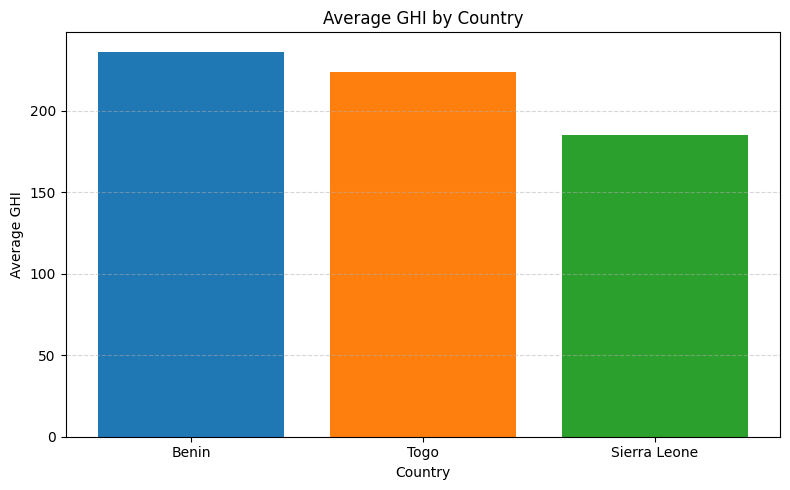

In [42]:
avg_ghi = {
    'Benin': df_benin['GHI'].mean(),
    'Sierra Leone': df_sierraleone['GHI'].mean(),
    'Togo': df_togo['GHI'].mean()
}

avg_ghi_df = pd.DataFrame(list(avg_ghi.items()), columns=['Country', 'Average_GHI'])

avg_ghi_df = avg_ghi_df.sort_values(by='Average_GHI', ascending=False)

plt.figure(figsize=(8, 5))
plt.bar(avg_ghi_df['Country'], avg_ghi_df['Average_GHI'], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Average GHI by Country')
plt.ylabel('Average GHI')
plt.xlabel('Country')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()